In [1]:
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

#Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [2]:
df= pd.read_csv('bmi.csv')

# BASIC DATA EXPLORATION

In [3]:
df.head(4)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3


Gender : Male / Female
Height : Number (cm)
Weight : Number (Kg)
Index :

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

we shall encode male and female

In [4]:
target = 'Index'
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

No missing values

In [5]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


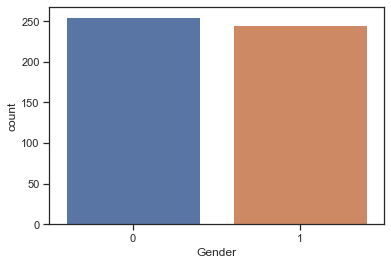

In [6]:
ax = sns.countplot(x = 'Gender', data = df)

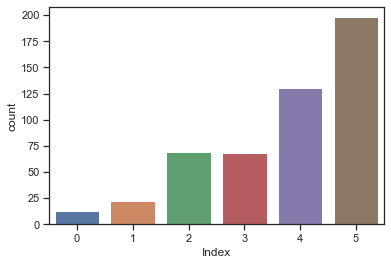

In [7]:
ax = sns.countplot(x = 'Index', data = df)

In [8]:
df.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.490000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


# DATA VISUALIZATION

<AxesSubplot:xlabel='Weight', ylabel='Height'>

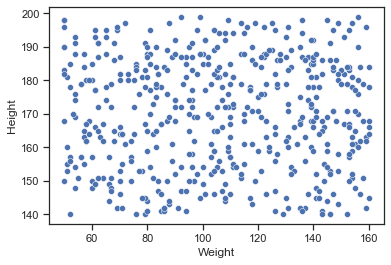

In [9]:
new = df[['Height','Weight']]
#visualizing outliers
sns.scatterplot(data=df, x='Weight', y='Height')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

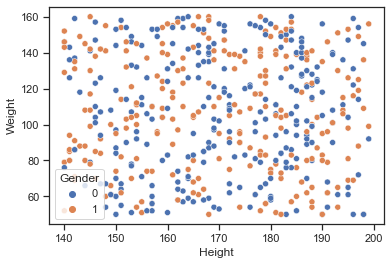

In [10]:
sns.scatterplot(x='Height',y='Weight',hue='Gender',data=df)

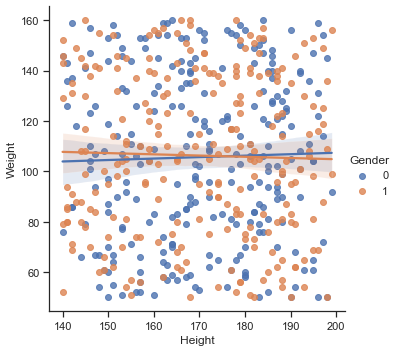

In [11]:
sns.lmplot(x="Height",y="Weight",hue='Gender',data=df)

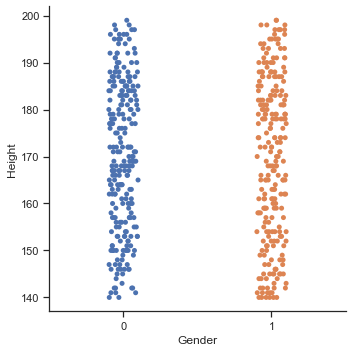

In [12]:
sns.catplot(x='Gender',y='Height',data=df)

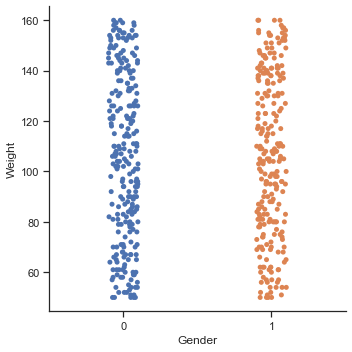

In [13]:
sns.catplot(x='Gender',y='Weight',data=df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

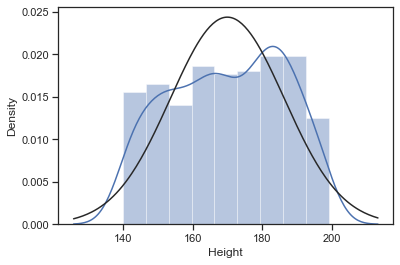

In [14]:
sns.distplot(df['Height'] , fit=norm)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

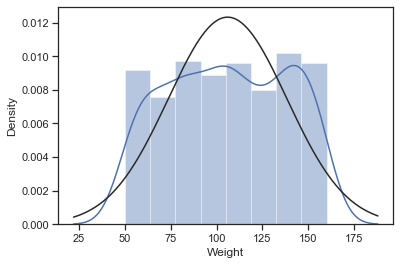

In [15]:
sns.distplot(df['Weight'] , fit=norm)

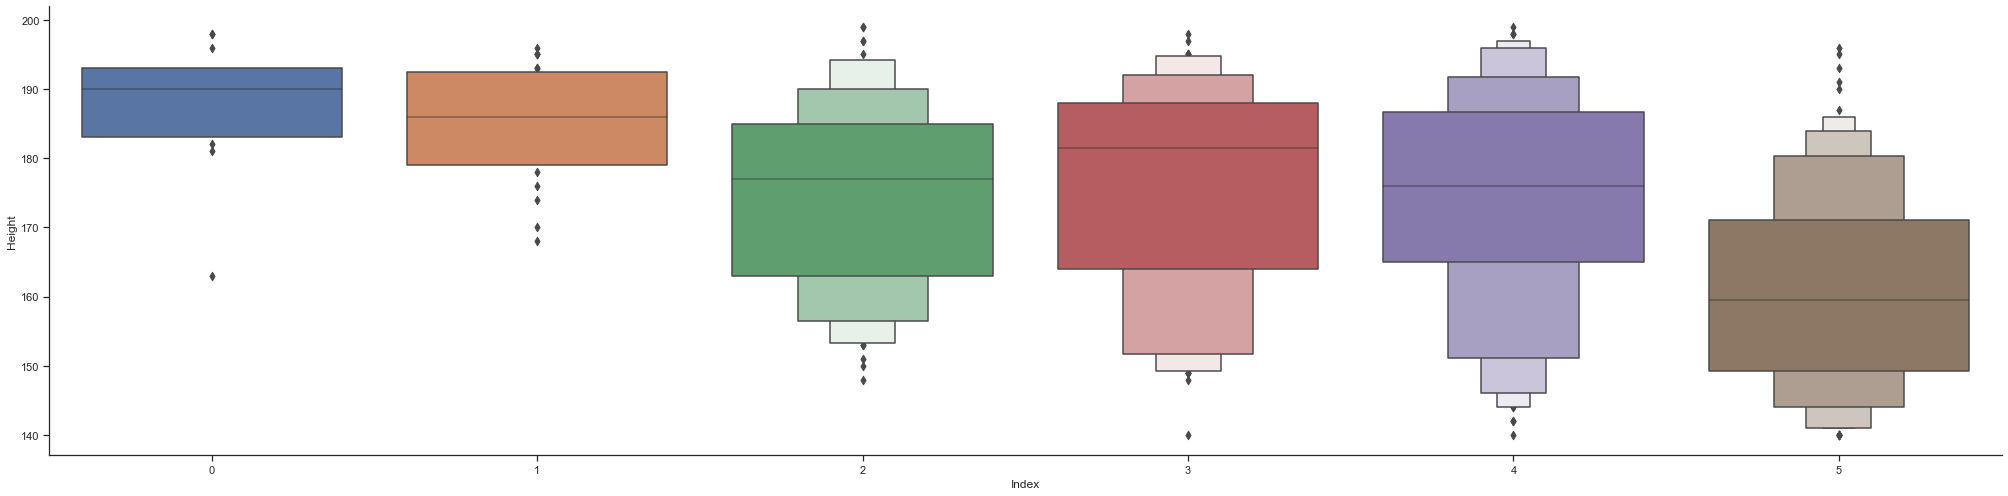

In [16]:
sns.catplot(y='Height',x='Index',data=df,kind="boxen",height=7,aspect=4)

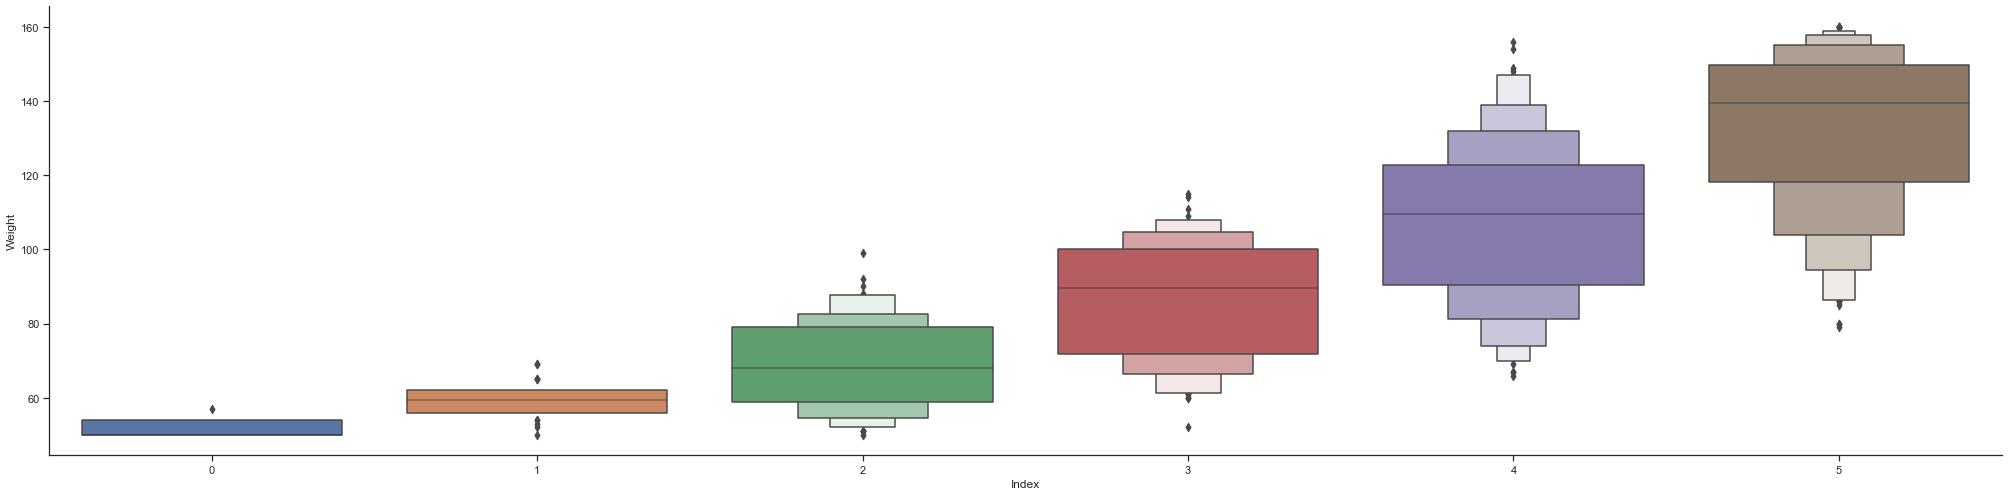

In [17]:
sns.catplot(y='Weight',x='Index',data=df,kind="boxen",height=7,aspect=4)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


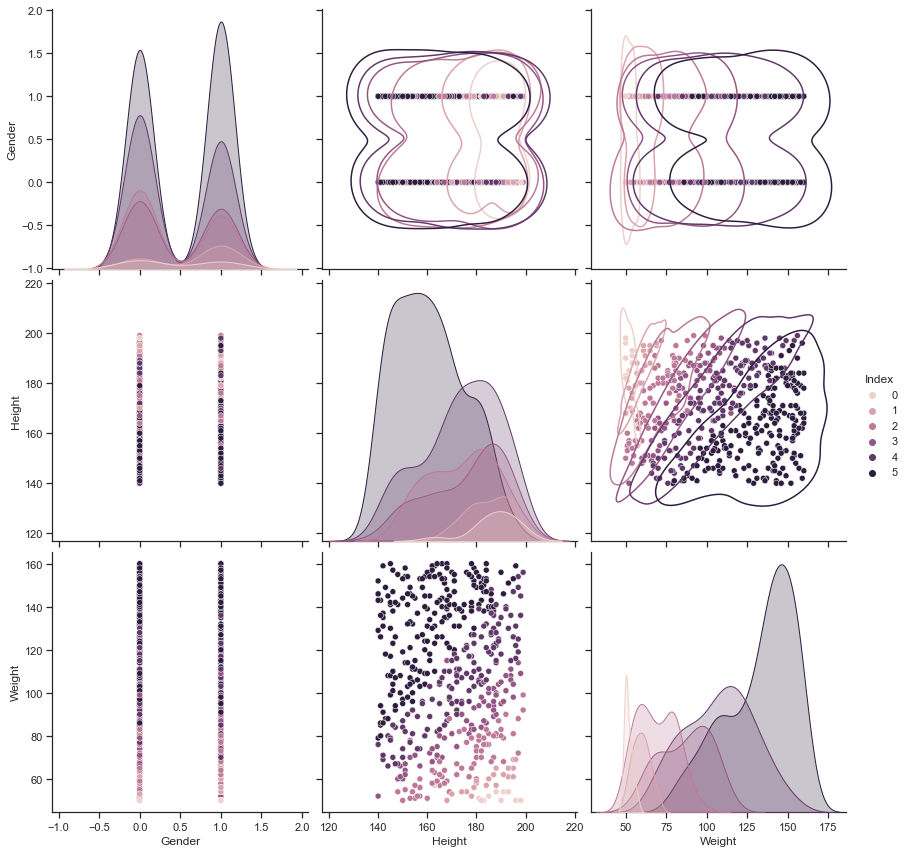

In [18]:
g=sns.pairplot(df, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e62c57e070>,
 'caps': [<matplotlib.lines.Line2D at 0x1e62c4bc040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e62c4db130>],
 'medians': [<matplotlib.lines.Line2D at 0x1e62c5e0c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e62c608760>],
 'means': []}

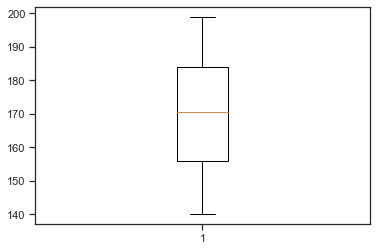

In [19]:
plt.boxplot(df['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e62cdc32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e62cdc38b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e62caabfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e62cdc3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e62cdca160>],
 'means': []}

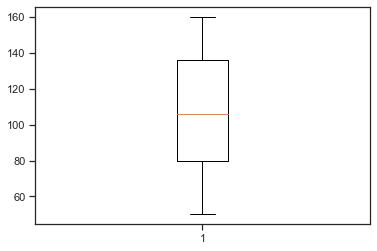

In [20]:
plt.boxplot(df['Weight'])

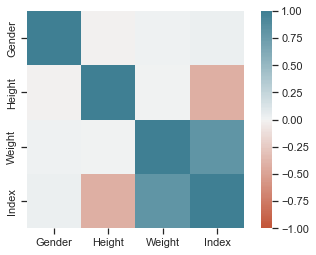

In [21]:
corr = df.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), 
                square = True)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

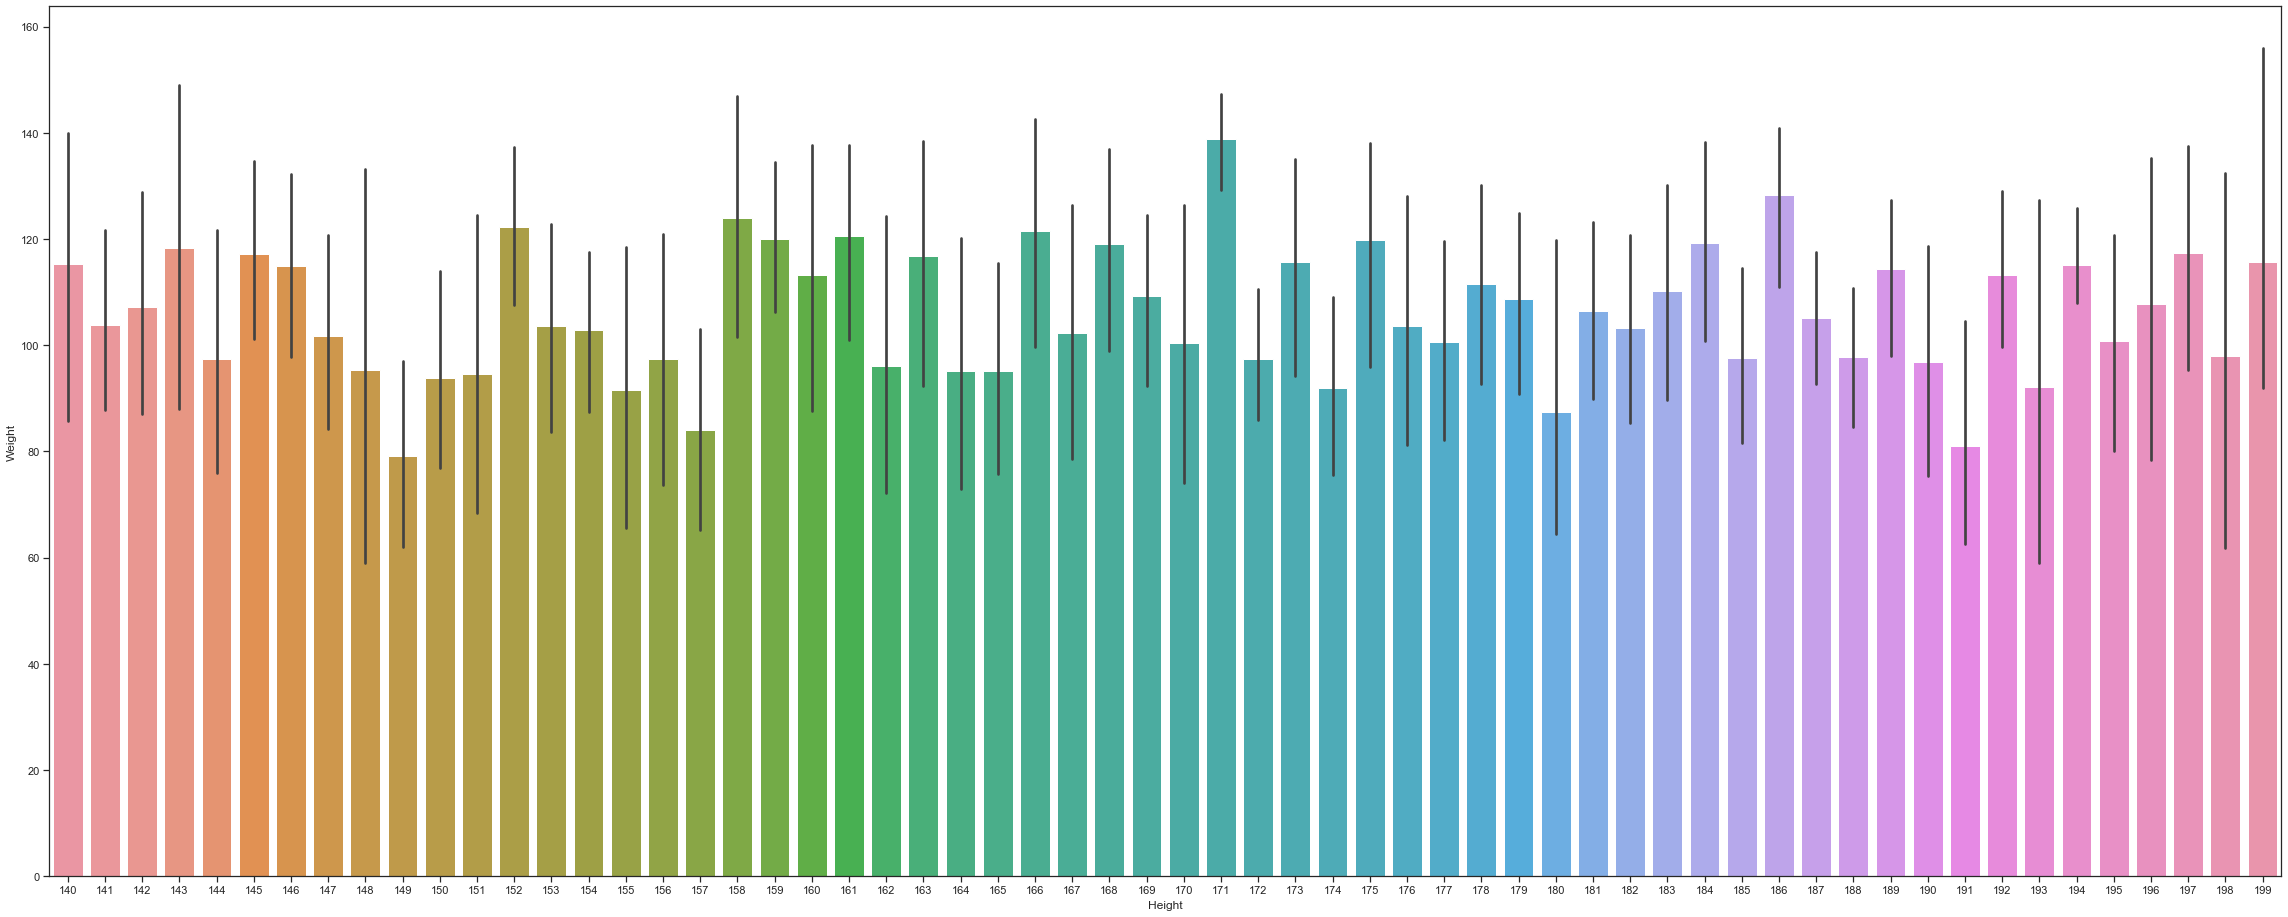

In [22]:
plt.figure(figsize=(40,16))
sns.barplot(x=df["Height"],y=df['Weight'])

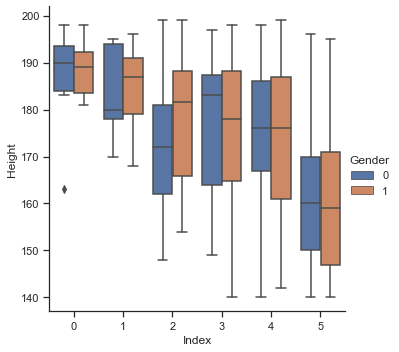

In [23]:
sns.catplot(x='Index',y='Height',hue="Gender",kind='box', data=df)

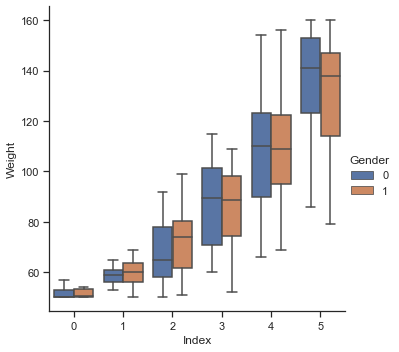

In [24]:
sns.catplot(x='Index',y='Weight',hue="Gender",kind='box', data=df)

<AxesSubplot:xlabel='Index', ylabel='Weight'>

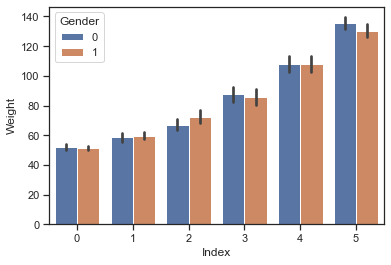

In [25]:
sns.barplot(x="Index",y="Weight",hue='Gender',data=df)

Women approximately have average weight equal to that of men's
Except lesser in index 2 and more in index 5

<AxesSubplot:xlabel='Index', ylabel='Height'>

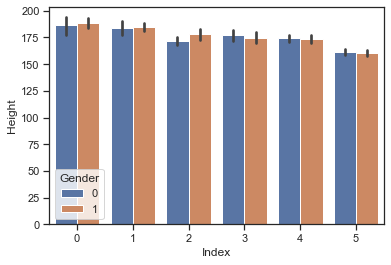

In [26]:
sns.barplot(x="Index",y="Height",hue="Gender",data=df)

Observe that people with higher BMI tends to have lesser height than people with lower BMI
Whereas people with higher BMI have more weight than people with lower BMI

In [27]:
df["BMI"] = round(df["Weight"]/((df["Height"])/100)**2, 2)   #Weight(Kg)/Height(m)^2
df.head()

,Gender,Height,Weight,Index,BMI
0,1,174,96,4,31.71
1,1,189,87,2,24.36
2,0,185,110,4,32.14
3,0,195,104,3,27.35
4,1,149,61,3,27.48


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


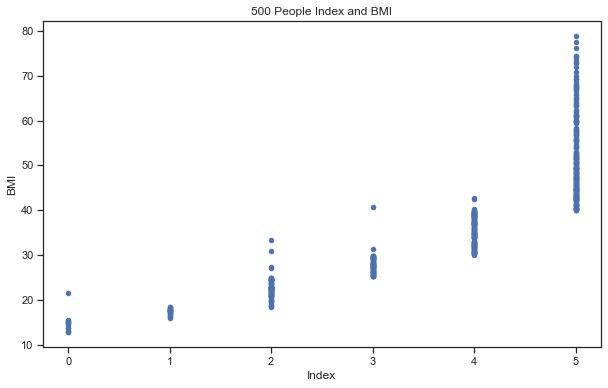

In [28]:
df.plot(x="Index", y="BMI", kind="scatter",
        figsize=(10,6),
        title="500 People Index and BMI");

As we see graphic, values range there are overlap. So, I edit according to WHO BMI and I add new column called "New_Index" column.

In [29]:
def index(x):
    if x["BMI"] <18.5:
        return 0
    elif 18.5<= x["BMI"] < 25:
        return 1
    elif 25<= x["BMI"] < 30:
        return 2
    elif 30<= x["BMI"] < 35:
        return 3
    elif 35<= x["BMI"] < 40:
        return 4
    elif x["BMI"] >= 40:
        return 5
df["New_Index"] = df.apply(index, axis=1)
df.head()

,Gender,Height,Weight,Index,BMI,New_Index
0,1,174,96,4,31.71,3
1,1,189,87,2,24.36,1
2,0,185,110,4,32.14,3
3,0,195,104,3,27.35,2
4,1,149,61,3,27.48,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


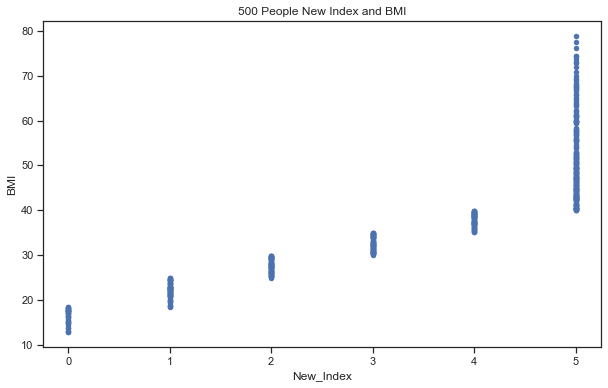

In [30]:
df.plot(x='New_Index', y='BMI', kind='scatter',
        figsize=(10,6),
        title='500 People New Index and BMI');

In [31]:
def status(x):
    if x["New_Index"] == 0:
        return "Underweight"
    elif x["New_Index"] == 1:
        return "Normal weight"
    elif x["New_Index"] == 2:
        return "Pre-Obesity"
    elif x["New_Index"] == 3:
        return "Obese Class I"
    elif x["New_Index"]== 4:
        return "Obese Class II"
    elif x["New_Index"] == 5:
        return "Obese Class III"
df["Status"] = df.apply(status, axis=1)
df.head()

,Gender,Height,Weight,Index,BMI,New_Index,Status
0,1,174,96,4,31.71,3,Obese Class I
1,1,189,87,2,24.36,1,Normal weight
2,0,185,110,4,32.14,3,Obese Class I
3,0,195,104,3,27.35,2,Pre-Obesity
4,1,149,61,3,27.48,2,Pre-Obesity


BMI Nutritional status:

Below 18.5 : Underweight

18.5–24.9 : Normal weight

25.0–29.9 : Pre-obesity

30.0–34.9 : Obesity class I

35.0–39.9 : Obesity class II

Above 40 : Obesity class III

In [32]:
df.drop(["Index"],axis=1,inplace = True)

In [33]:
df.head()

,Gender,Height,Weight,BMI,New_Index,Status
0,1,174,96,31.71,3,Obese Class I
1,1,189,87,24.36,1,Normal weight
2,0,185,110,32.14,3,Obese Class I
3,0,195,104,27.35,2,Pre-Obesity
4,1,149,61,27.48,2,Pre-Obesity


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


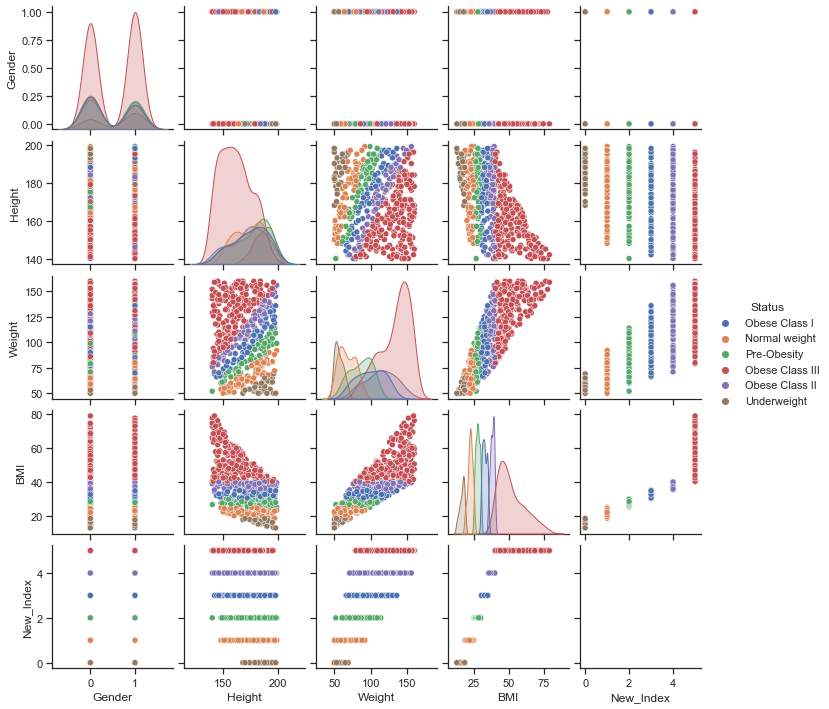

In [34]:
sns.pairplot(df, hue='Status', size=2);

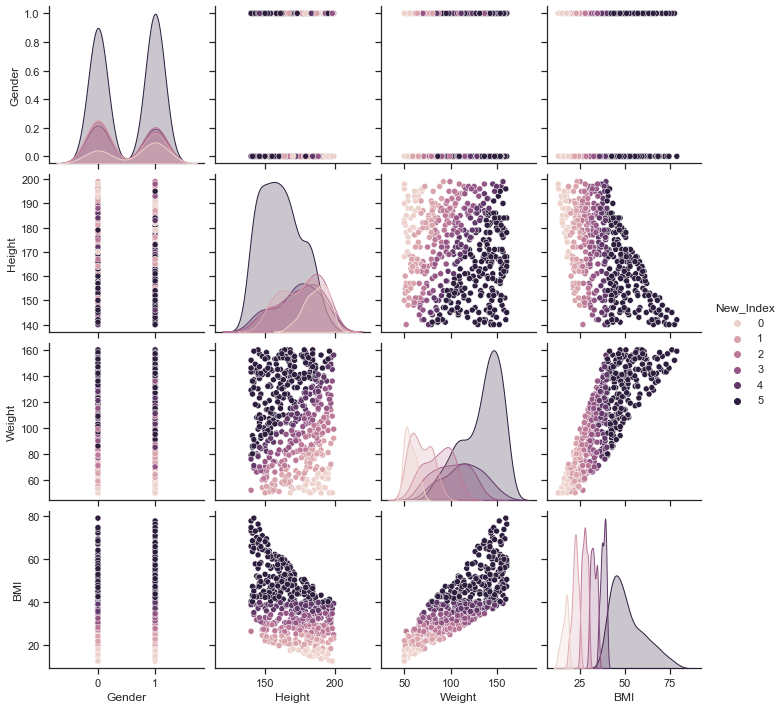

In [35]:
sns.pairplot(df, hue='New_Index')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


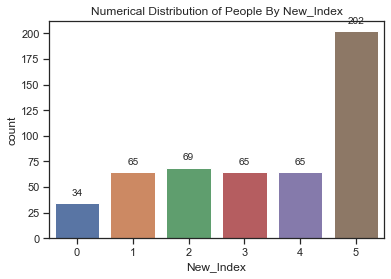

In [36]:
ax = sns.countplot(df['New_Index']);

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
ax.set_title("Numerical Distribution of People By New_Index");

Obese Class III    202
Pre-Obesity         69
Obese Class I       65
Normal weight       65
Obese Class II      65
Underweight         34
Name: Status, dtype: int64



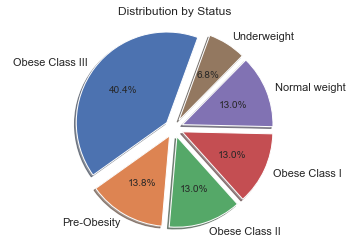

In [37]:
print(df["Status"].value_counts())
print()

label =  "Obese Class III", "Pre-Obesity", "Obese Class II", "Obese Class I","Normal weight", "Underweight"
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
sizes = df["Status"].value_counts(normalize = True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = label, autopct="%1.1f%%", shadow=True, startangle=70)
ax1.axis("equal") 
plt.title("Distribution by Status")
plt.rcParams['figure.figsize'] = [5, 5]
plt.show();

0    255
1    245
Name: Gender, dtype: int64



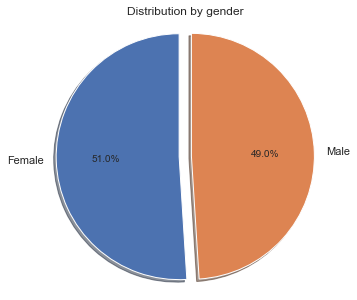

In [38]:
print(df["Gender"].value_counts())
print()

label =  "Female", "Male"
explode = (0, 0.1)
sizes = df["Gender"].value_counts(normalize = True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal") 
plt.title("Distribution by gender")
plt.rcParams['figure.figsize'] = [4, 4]
plt.show();

In [39]:
multi = df.set_index(["Gender", "New_Index", "Status"]).sort_index()
multi

Height  Weight    BMI
Gender New_Index Status                                
0      0         Underweight         195      65  17.09
                 Underweight         176      54  17.43
                 Underweight         191      54  14.80
                 Underweight         190      50  13.85
                 Underweight         196      50  13.02
...                                  ...     ...    ...
1      5         Obese Class III     154     112  47.23
                 Obese Class III     195     153  40.24
                 Obese Class III     152      98  42.42
                 Obese Class III     150      95  42.22
                 Obese Class III     173     131  43.77

[500 rows x 3 columns]

# MACHINE LEARNING

In [40]:
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [41]:
X = df.drop(["New_Index", "Gender", "Status"], axis=1)
y = df["New_Index"]
X, y = SMOTE().fit_resample(X, y)

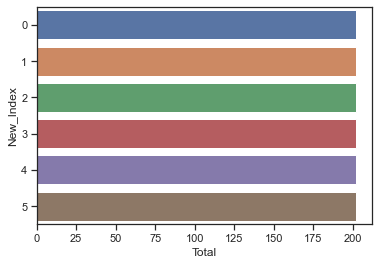

In [42]:
sns.countplot(y=y, data=df)
plt.ylabel("New_Index")
plt.xlabel("Total")
plt.show()


In [43]:
X = MinMaxScaler().fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

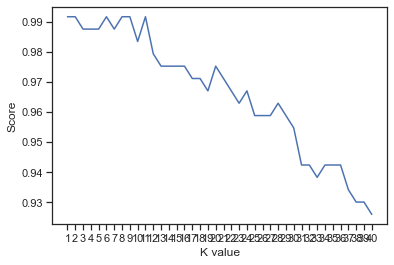

KNN best accuracy: 99.18%


In [45]:
knn = []
for i in range(1,41):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    knn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,41), knn)
plt.xticks(np.arange(1,41,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

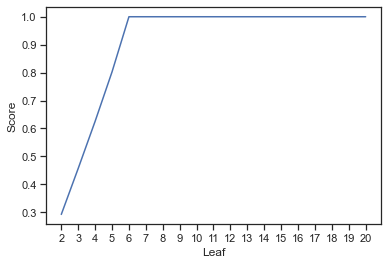

Decision Tree Accuracy: 100.00%


In [46]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [47]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
root=Tk()
root.title("Health Me Up!")
root.configure(background='#FFE4C4')

#Function to predict the outcome
def predict():
    name=ent1.get()
    heightin=float(ent2.get())
    weight=int(ent3.get())
    gender=int(g.get())

In [51]:
#Fetching the Data
    df=pd.read_csv("bmi.csv")
    df_dataframe=pd.DataFrame(data)

IndentationError: unexpected indent (773900156.py, line 2)